In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import geopandas as gpd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

pd.set_eng_float_format(accuracy=4, use_eng_prefix=True)

import sys
sys.path.append('..')
from src.utils import get_data

In [2]:
terminals, time_matrix = get_data('../data/')

In [3]:
import heapq


def create_spanning_tree(graph, starting_vertex):
    mst = []
    visited = set([starting_vertex])
    edges = [(graph[starting_vertex][to], starting_vertex, to) for to in range(len(graph))]
    heapq.heapify(edges)

    while edges:
        cost, frm, to = heapq.heappop(edges)
        if to not in visited:
            visited.add(to)
            mst.append((frm, to))
            for to_next in range(len(graph)):
                cost = graph[to][to_next]
                if to_next not in visited:
                    heapq.heappush(edges, (cost, to, to_next))

    mst = np.array(mst)
    return mst

edges = create_spanning_tree(time_matrix, 0)

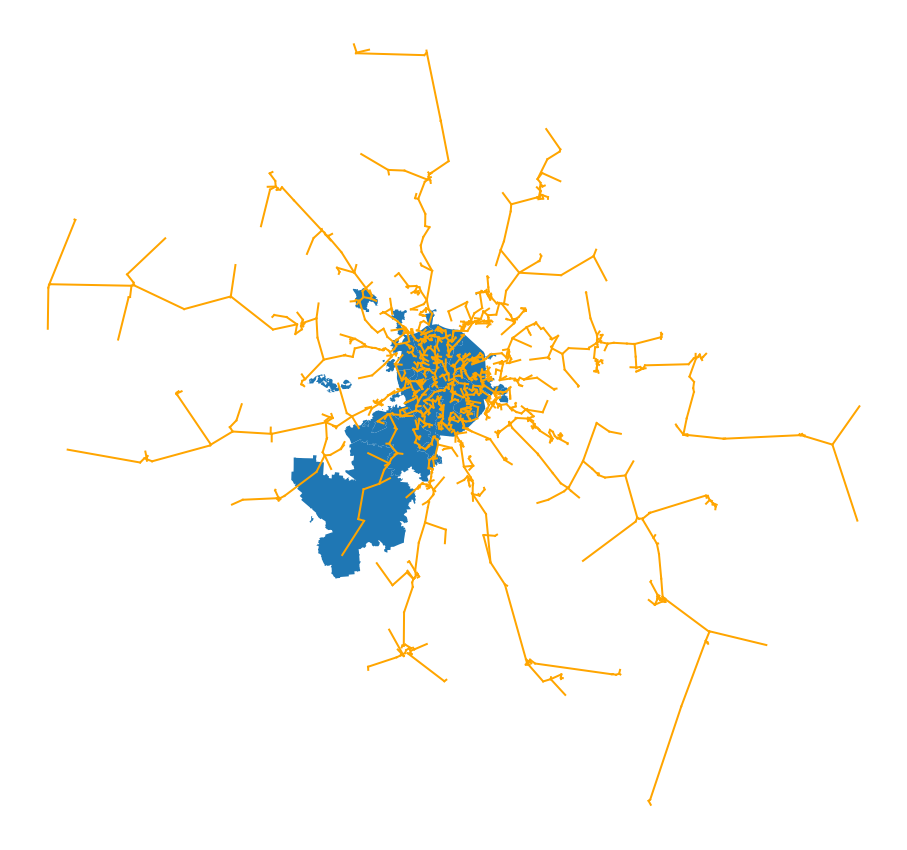

In [7]:
moscow = gpd.read_file('ao-shape.zip')

idx = np.arange(1630)
fig, ax = plt.subplots(figsize=(16, 16))
moscow.plot(ax=ax)

for route in edges:
    plt.plot(terminals['longitude'].iloc[route], terminals['latitude'].iloc[route], c='orange', lw=2)

plt.axis('off')
# plt.title('Терминалы на карте')
plt.savefig('mst.png', transparent=True)
plt.show()